In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.patches as patches
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
from scalebar import scale_bar #Imported code from the internet

from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [43]:
cname = 'Tan'; year = 2009;
mat = scipy.io.loadmat(r'C:\Users\{}\Dropbox\DEBtool\Perna_perna\Test.mat'.format(cname))
mat2 = scipy.io.loadmat(r'C:\Users\{}\Dropbox\DEBtool\Perna_perna\DEBmatrix{}.mat'.format(cname, year))

#mat_std1 = scipy.io.loadmat(r'C:\Users\{}\Dropbox\DEBtool\Perna_perna\std_Li_corr.mat'.format(cname))
#mat_std2 = scipy.io.loadmat(r'C:\Users\{}\Dropbox\DEBtool\Perna_perna\std_rB_corr.mat'.format(cname))

#mat_p = scipy.io.loadmat(r'C:\Users\{}\Dropbox\DEBtool\Perna_perna\P_coefficient.mat'.format(cname))

In [44]:
#r_B = np.array(mat['r_B'])
lat = np.array(mat['latCHL']).ravel()
lon = np.array(mat['lonCHL']).ravel()

L_i_mean = np.array(mat2['L_i'])
L_i_corr = np.array(mat2['L_i_corr'])
r_B_mean = np.array(mat2['r_B'])
r_B_mean_corr = np.array(mat2['r_B_corr'])

#std_li = np.array(mat_std1['std_Li_corr'])
#std_rb = np.array(mat_std2['std_rB_corr'])

#P = np.array(mat_p['P'])

In [45]:
lonmin = lon.min()
lonmax = lon.max()
latmin = lat.min()
latmax = lat.max()
deltalon = lonmax - lonmin
deltalat = latmax - latmin

In [46]:
[lonmin, latmin, lonmax, latmax]

[-51.679176330566406,
 -29.929147720336914,
 -39.600826263427734,
 -20.920852661132812]

In [47]:
#How to find L_i and r_B values for these coordinates?
SC1 = [-26.966667, -48.583333] 
SC2 = [-27.483333, -48.533333]
SP1 = [-23.533333, -45.066667]

In [48]:
# If i append to lat and long and then find their locations?
def locpixel(latlon, latstr, lonstr):
    """Locate the pixel coordinate"""
    ploc_lat = np.append(latstr, latlon[0])
    ploc_lat.sort(); #ploc_lat = np.flip(ploc_lat)
    ploc_lon = np.append(lonstr, latlon[1])
    ploc_lon.sort(); #ploc_lon = np.flip(ploc_lon)
    plat_i = np.array(len(latstr))-np.where(ploc_lat == latlon[0]) #Had to correct Lat to get real values
    plon_i = np.where(ploc_lon == latlon[1])
    
    return (int(plat_i[0]), int(plon_i[0]))

In [49]:
iSP1 = locpixel(SP1, lat, lon) # Ubatuba
iSC1 = locpixel(SC1, lat, lon) # Armação de Itapocoroy
iSC2 = locpixel(SC2, lat, lon) # Florianópolis

In [50]:
L_i_corr[iSP1], L_i_corr[iSC1], L_i_corr[iSC2]

(3.446767521368707, 6.110513217124018, nan)

In [51]:
r_B_mean_corr[iSP1], r_B_mean_corr[iSC1], r_B_mean_corr[iSC2]

(0.013670387150109398, 0.011625556315048422, nan)

In [52]:
# SC2 pixel is on land, let's use the next pixel to the east
L_i_corr[iSC2[0], (iSC2[1]-1)], r_B_mean_corr[iSC2[0], (iSC2[1]-1)]

(8.099090876117515, 0.01064612849009705)

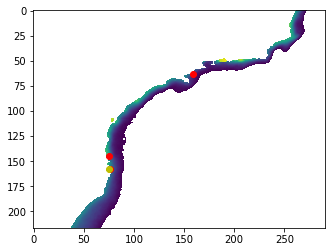

In [15]:
plt.imshow(L_i_corr)
sct_x = [iSP1[1], iSC1[1], iSC2[1]]
sct_y = [iSP1[0], iSC1[0], iSC2[0]]
plt.scatter(sct_x, sct_y, color='r')
plt.scatter((iSC2[1]-1), iSC2[0], color='y')

In [ ]:
arquivo = shpreader.natural_earth(resolution='10m', category='cultural', name='admin_1_states_provinces')
parser = shpreader.Reader(arquivo)

In [ ]:
#L_i mean contourf for PCSE
paises = parser.records()
fig=plt.figure(figsize=(10, 10), dpi=600)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.OCEAN, facecolor = 'k')#, alpha=.8)
ax.add_feature(cfeature.LAND, facecolor = 'k')#, alpha=.8)

extent = [-49.5, -41.5, -29, -22.5]
ax.set_extent(extent)

for estado in paises:
    if estado.attributes['admin'] == 'Brazil':        
        ax.add_geometries([estado.geometry], ccrs.PlateCarree(), facecolor='darkgray', edgecolor='k')

#Plotting with corrected by shape coeficient values
li_max = max(L_i_corr[~np.isnan(L_i_corr)])
li_min = min(L_i_corr[~np.isnan(L_i_corr)])
vmin, vmax = li_min, li_max
levels = np.linspace(vmin,vmax,10)  
plt.contourf(lon, lat, L_i_corr, cmap = 'rainbow',
             vmin=vmin, vmax=vmax, levels=levels, transform=ccrs.PlateCarree())

#cbaxes = inset_axes(ax, width="4%", height="60%",height="60%", loc=4)
cbar = plt.colorbar(ax=ax, orientation="horizontal", shrink=.84, pad=.06)
cbar.set_label('Ultimate scaled length (cm)', fontsize = 18, labelpad = 8)

plt.contour(lon, lat, L_i_corr, colors='k', levels=levels, transform=ccrs.PlateCarree(), linewidths=0.2)

# Setting up gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0.6, color='white', alpha=0.9)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlocator = mticker.FixedLocator([-52, -50, -48, -46, -44, -42, -40, -38])
gl.ylocator = mticker.FixedLocator([-21, -23, -25, -27, -29, -31])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# State name labels
plt.text(-43.5, -22.8, 'RJ', horizontalalignment='right', transform=ccrs.PlateCarree(), 
         size='large', color='k')
plt.text(-47.5, -23.5, 'SP', horizontalalignment='right', transform=ccrs.PlateCarree(), 
         size='large', color='k')
plt.text(-48.9, -25.4, 'PR', horizontalalignment='right', transform=ccrs.PlateCarree(), 
         size='large', color='k')
plt.text(-49, -27.6, 'SC', horizontalalignment='right', transform=ccrs.PlateCarree(), 
         size='large', color='k')

# Set scale bar (using scalebar.py, not cartopy)
text_kwargs = dict(size='large')
plot_kwargs = dict(linewidth=3.6)
scale_bar(ax, (0.8, 0.1), 100, text_kwargs=text_kwargs, plot_kwargs=plot_kwargs, color='white')

# North arrow
plt.arrow(-42.6, -27.75, 0, 0.2, linewidth=6, head_width=0.15, head_length=0.1, 
          fc='white', ec='white', transform=ccrs.PlateCarree())
plt.text(-42.53, -28, 'N', horizontalalignment='right', transform=ccrs.PlateCarree(), 
         fontsize = 15, weight='bold', color='white')

#Plot scatter data points from literature
sct_x = [SP1[1], SC1[1], SC2[1]]
sct_y = [SP1[0], SC1[0], SC2[0]]
plt.scatter(sct_x, sct_y, s=100, color='w', alpha=1)

fig.canvas.draw()
plt.tight_layout(pad=3.55)

#plt.savefig('plt_Li_PCSE_mean', dpi = 500)